# PREDICTING CAR FUEL EFFICIENCY

# Set up the environment

In [107]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Dataset

For this homework, we'll use the Car Fuel Efficiency dataset.


In [108]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


# Preparing the dataset

Preparing the dataset
Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`

In [110]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

In [111]:
df.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


# EDA

* Look at the `fuel_efficiency_mpg` variable. Does it have a long tail?

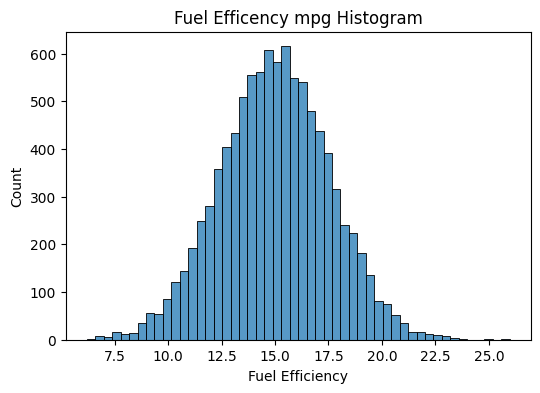

In [112]:
plt.figure(figsize=(6,4))

sns.histplot(df.fuel_efficiency_mpg, bins=50)
plt.title('Fuel Efficency mpg Histogram')
plt.xlabel('Fuel Efficiency')
plt.show()

R/ No, I doesn't have a long tail, but a bell shape, like a normal distribution

# Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`

In [113]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

R1/ `'horsepower'`is the column with missing values

# Question 2

What's the median (50% percentile) for variable 'horsepower'?

* 49
* 99
* 149
* 199
  

In [114]:
meanHP = df['horsepower'].median()
print(f'The median (50% percentile) for variable "horsepower" is {meanHP}')

The median (50% percentile) for variable "horsepower" is 149.0


## Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
  
Use the same code as in the lectures

In [115]:
# Splitting the dataset into the train, validation, and the test dataset
n = len(df)

# Validation dataset
n_val = int(n*0.2)

# Test dataset
n_test = int(n*0.2)

# Train dataset
n_train = n-n_val-n_test

n, n_train, n_val, n_test

(9704, 5824, 1940, 1940)

In [116]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [117]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [118]:
# Reset index in each dataframe
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

Options:

* With 0
* With mean
* Both are equally good

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


In [120]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'age']

In [121]:
# Linear Regression

def train_linear_regression(X,y,r=0):
    #X: feature Matrix
    #y: target value
    #r: regularization value
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX = XTX +r*np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [122]:
# Preparing the dataframe

def prepare_X(df, base, fillOpt):
    # df: original dataframe
    # base: base dataframe
    # fillOpt: Option for replacing null values:{zero, mean}
    df['age']=df.model_year.max()-df.model_year
    
    df_num = df[base]
    if fillOpt == "zero":
        df_num = df_num.fillna(0)
        X = df_num.values
    elif fillOpt == "mean":
        media_col = df_num['horsepower'].mean()
        df_num.horsepower.fillna(media_col, inplace=True)
        X = df_num.values
    else: print('invalid option')
    
    return X
        

In [123]:
# RMSE 

def rmse(y,y_pred):
    error = y_pred -y
    mse = (error**2).mean()
    return np.sqrt(mse)

In [124]:
# Plot Prediction vs actual distribution

def plotDistribution(y_train, y_pred):
    sns.histplot(y_train, label='target', color='red', alpha=0.5, bins=50)
    sns.histplot(y_pred, label='prediction', color='blue', alpha=0.5, bins=50)

    plt.legend()

    plt.ylabel('Frequency')
    plt.xlabel('fuel efficiency mpg')
    plt.title('Predictions vs actual distribution')

    plt.show()

In [125]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


## Q3-1: Filling missing values with 0

train filling with zero 0.5202614265099077


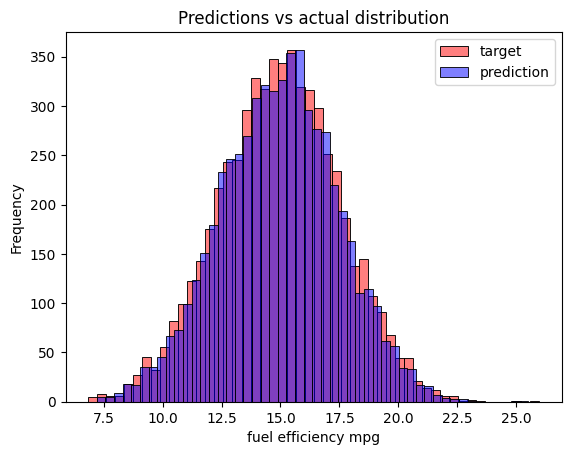

In [126]:
X_train_zero = prepare_X(df_train, base, 'zero')
y_train = df_train.fuel_efficiency_mpg.values

w_0_zero, w_zero = train_linear_regression(X_train_zero,y_train,r=0)
y_pred_zero = w_0_zero + X_train_zero.dot(w_zero)

print('train filling with zero', rmse(y_train, y_pred_zero))

plotDistribution(y_train, y_pred_zero)

## Q3-2: Filling missing values with mean value

/tmp/ipykernel_3189/3457488519.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_num.horsepower.fillna(media_col, inplace=True)
/tmp/ipykernel_3189/3457488519.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.horsepower.fillna(media_col, inplace=True)


train filling with mean value 0.4624412137959964


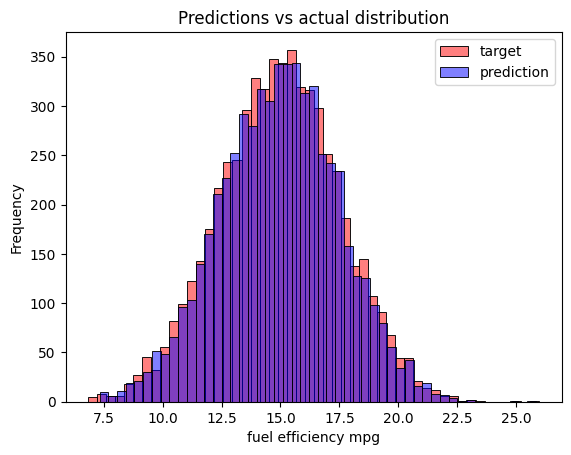

In [127]:
X_train_mean = prepare_X(df_train, base, 'mean')
y_train = df_train.fuel_efficiency_mpg.values

w_0_mean, w_mean = train_linear_regression(X_train_mean,y_train,r=0)
y_pred_mean = w_0_mean + X_train_mean.dot(w_mean)

print('train filling with mean value', rmse(y_train, y_pred_mean))

plotDistribution(y_train, y_pred_mean)

The option which gives better RMSE corresponds to fill the missing values with the `'mean value of the feature'`

# Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If multiple options give the same best RMSE, select the smallest `r`.

Options:

* 0
* 0.01
* 1
* 10
* 100

# Question 5
* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits `(round(std, 3)`)

What's the value of std?

* 0.001
* 0.006
* 0.060
* 0.600
  
Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is _stable_.

# Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`.
What's the RMSE on the test dataset?

Options:

* 0.15
* 0.515
* 5.15
* 51.5